In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [12]:
%%R -o df
#open weather_waterlevel_yearly.csv as an R dataframe
df <- read.csv('2023_subway_merged2.csv')


In [13]:
#show me the column names in df
print(df.columns)

Index(['GEOID', 'Common.Name', 'Equipment.Description', 'Station.MRN_x',
       'Station.ID', 'Complex.ID', 'GTFS.Stop.ID', 'Division', 'Line',
       'Stop.Name', 'Borough_x', 'Daytime.Routes', 'Structure', 'lat', 'long',
       'North.Direction.Label', 'South.Direction.Label', 'ADA', 'ADA.Notes',
       'Georeference', 'STATE', 'COUNTY', 'TRACT', 'BLOCK', 'NAME', 'geometry',
       'population_estimate', 'sub_pop_estimate', 'amb_pop_estimate',
       'med_earn_estimate', 'population_moe', 'sub_pop_moe', 'amb_pop_moe',
       'med_earn_moe', 'outage_count', 'Time.Since.Major.Improvement_x',
       'Month', 'Borough_y', 'Equipment.Type', 'Total.Outages',
       'Scheduled.Outages', 'Unscheduled.Outages', 'Entrapments',
       'Time.Since.Major.Improvement_y', 'AM.Peak.Availability',
       'AM.Peak.Hours.Available', 'AM.Peak.Total.Hours',
       'PM.Peak.Availability', 'PM.Peak.Hours.Available',
       'PM.Peak.Total.Hours', 'X24.Hour.Availability',
       'X24.Hour.Hours.Available', '

`geom_smooth()` using formula = 'y ~ x'


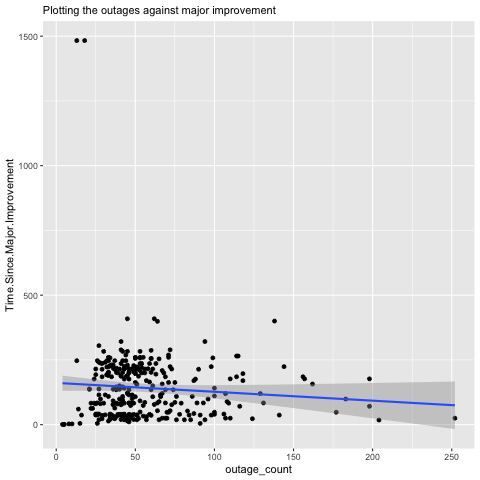

In [17]:
%%R
ggplot(df, aes(x=outage_count, y=Time.Since.Major.Improvement)) +
     geom_point() +
     labs(subtitle="Plotting the outages against major improvement") +
     theme(
        plot.title = element_text(size=20, face="bold"),
    ) +
    geom_smooth(method = 'lm')

In [16]:
%%R
#show me the linear regression of the two columns
lm(Time.Since.Major.Improvement ~ outage_count, data=df)


Call:
lm(formula = Time.Since.Major.Improvement ~ outage_count, data = df)

Coefficients:
 (Intercept)  outage_count  


    161.4240       -0.3435  



`geom_smooth()` using formula = 'y ~ x'


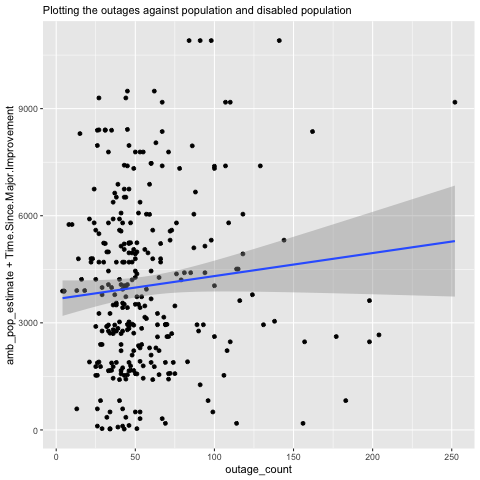

In [19]:
%%R
ggplot(df, aes(x=outage_count, y=amb_pop_estimate+Time.Since.Major.Improvement)) +
     geom_point() +
     labs(subtitle="Plotting the outages against population and disabled population") +
     theme(
        plot.title = element_text(size=20, face="bold"),
    ) +
    geom_smooth(method = 'lm')

In [20]:
%%R 

model <- lm(outage_count ~ amb_pop_estimate+Time.Since.Major.Improvement, data = df)
summary(model)


Call:
lm(formula = outage_count ~ amb_pop_estimate + Time.Since.Major.Improvement, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.741 -19.528  -8.633  10.186 185.687 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  54.5716031  4.3056171  12.675   <2e-16 ***
amb_pop_estimate              0.0013349  0.0008185   1.631    0.104    
Time.Since.Major.Improvement -0.0191101  0.0138801  -1.377    0.170    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.42 on 302 degrees of freedom
Multiple R-squared:  0.01563,	Adjusted R-squared:  0.009107 
F-statistic: 2.397 on 2 and 302 DF,  p-value: 0.09272



In [9]:
%%R -o df
#read csv file
df <- read.csv('test.csv')
#show me the column names in df


In [13]:
print(df.columns)

Index(['GEOID', 'Common.Name', 'Equipment.Description', 'Station.MRN_x',
       'Station.ID', 'Complex.ID', 'GTFS.Stop.ID', 'Division', 'Line',
       'Stop.Name', 'Borough_x', 'Daytime.Routes', 'Structure', 'lat', 'long',
       'North.Direction.Label', 'South.Direction.Label', 'ADA', 'ADA.Notes',
       'Georeference', 'STATE', 'COUNTY', 'TRACT', 'BLOCK', 'NAME', 'geometry',
       'population_estimate', 'sub_pop_estimate', 'amb_pop_estimate',
       'med_earn_estimate', 'population_moe', 'sub_pop_moe', 'amb_pop_moe',
       'med_earn_moe', 'outage_count', 'Time.Since.Major.Improvement_x',
       'Month', 'Borough_y', 'Equipment.Type', 'Total.Outages',
       'Scheduled.Outages', 'Unscheduled.Outages', 'Entrapments',
       'Time.Since.Major.Improvement_y', 'AM.Peak.Availability',
       'AM.Peak.Hours.Available', 'AM.Peak.Total.Hours',
       'PM.Peak.Availability', 'PM.Peak.Hours.Available',
       'PM.Peak.Total.Hours', 'X24.Hour.Availability',
       'X24.Hour.Hours.Available', '

In [14]:
%%R 

model <- lm(outage_count ~ amb_pop_estimate+Time.Since.Major.Improvement+X2021, data = df)
summary(model)


Call:
lm(formula = outage_count ~ amb_pop_estimate + Time.Since.Major.Improvement + 
    X2021, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.000 -17.193  -4.667   7.769 147.208 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   5.721e+01  5.761e+00   9.931  < 2e-16 ***
amb_pop_estimate             -3.673e-04  1.090e-03  -0.337  0.73634    
Time.Since.Major.Improvement  3.065e-02  2.769e-02   1.107  0.26935    
X20211,317                    7.305e+00  2.391e+01   0.306  0.76020    
X20211,466                    4.443e+00  1.962e+01   0.226  0.82106    
X20211,887                    3.048e+01  1.968e+01   1.549  0.12265    
X20211,946                   -2.031e+01  1.990e+01  -1.021  0.30839    
X202110,331                  -2.043e+01  2.365e+01  -0.864  0.38835    
X202110,558                   2.222e+00  2.417e+01   0.092  0.92681    
X202111,477                  -6.925e+00  2.411e+01  -0.287  0.7